In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import brewer2mpl

In [2]:
# brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set1', 'qualitative', 4)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 8,
 #  'text.fontsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [10, 5]
   }
mpl.rcParams.update(params)

In [3]:
path_folder = "./experimentations/3_freeze_bert"
os.listdir('./experimentations/3_freeze_bert')

['sud_naija_bert-type_mbert-seed_1_history.csv',
 'sud_naija-type_roberta-base-freeze_bert-seed_1_history.csv',
 'sud_naija-type_roberta-base-freeze_bert-seed_2_history.csv',
 'sud_naija-type_camembert-base-freeze_bert-seed_2_history.csv',
 'sud_naija-type_bert-base-chinese-freeze_bert-seed_2_history.csv',
 'sud_naija-type_bert-base-cased-freeze_bert-seed_2_history.csv',
 'sud_naija-type_bert-base-cased-freeze_bert-reinit_0-seed_1_history.csv',
 'sud_naija_bert-type_bert-seed_1_history.csv',
 'sud_naija-type_camembert-base-freeze_bert-seed_1_history.csv',
 'sud_naija-type_bert-base-multilingual-cased-freeze_bert-reinit_0-seed_1_history.csv',
 'sud_naija-type_bert-base-multilingual-cased-freeze_bert-seed_2_history.csv',
 'sud_naija-type_bert-base-chinese-freeze_bert-seed_1_history.csv']

In [10]:
bert_modeles = {
     "BERT multilingue"                : 'sud_naija_bert-type_mbert-seed_1_history.csv',
     "BERT multilingue (freezed)"       : 'sud_naija-type_bert-base-multilingual-cased-freeze_bert-seed_1_history.csv',
     "BERT anglais"                    :'sud_naija_bert-type_bert-seed_1_history.csv',
     "BERT anglais (freezed)"           :'sud_naija-type_bert-base-cased-freeze_bert-seed_1_history.csv',
 
}

In [11]:
for name, file_name in bert_modeles.items():
    path_model = os.path.join(path_folder, file_name)
    df_model = pd.read_csv(path_model, delimiter='\t')
    df_model['n_epoch'] = df_model['n_epoch'] +1
    print(name)
    print(df_model["LAS_epoch"].max())
    print()

BERT multilingue
0.8963229416466827

BERT multilingue (freezed)
0.7326938449240608

BERT anglais
0.8905675459632294

BERT anglais (freezed)
0.7649080735411671



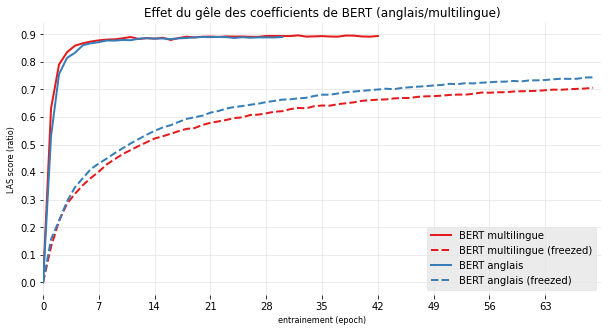

In [23]:
# put this _before_ the calls to plot and fill_between
plt.axes(frameon=0)
plt.grid(color="0.9")

df_tableau = pd.DataFrame(columns = ['modèle' ,'LAS', 'UAS', 'Labeling score', 'POS score'])

x_max = 70
seed = 1
for name, file_name in bert_modeles.items():
    if "freeze" in file_name:
        file_name = file_name.replace("seed_1", "seed_{}".format(seed))
    path_model = os.path.join(path_folder, file_name)
    df_model = pd.read_csv(path_model, delimiter='\t')
    if "freeze" not in name:
        df_model['n_epoch'] = df_model['n_epoch'] +1
        df_model.loc[-1] = [0] * len(df_model.columns)
        df_model.index = df_model.index + 1  # shifting index
        df_model.sort_index(inplace=True) 
    
    df_tableau.loc[name] = [name] + list(df_model[['LAS_epoch', 'acc_head_epoch', 'acc_deprel_main_epoch', 'acc_pos_epoch']].iloc[df_model.idxmax()['LAS_epoch']])
    
    if "freeze" in name :
        linestyle='--'
    else:
        linestyle='-'
        
    if "multilingue" in name:
        i = 0
    else:
        i = 1
    plt.plot(df_model.iloc[:x_max]['n_epoch'], df_model.iloc[:x_max]['LAS_epoch'], linewidth=2, linestyle=linestyle,color=colors[i])

    
    
df_tableau = df_tableau.set_index("modèle")

legend = plt.legend(bert_modeles.keys(), loc=4);
plt.xlabel('entrainement (epoch)')
plt.ylabel('LAS score (ratio)')
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
title = plt.title("Effet du gêle des coefficients de BERT (anglais/multilingue)")

x_range = int(np.ceil(x_max/10))
plt.xticks(np.arange(0, x_max, x_range))
plt.xlim([0,x_max])

plt.yticks(np.arange(0, 1, 0.1))

for ext_file in ['png', 'svg']:
    plt.savefig('3_freeze_bert_anglaisVSmulti_{}_epochs_seed_{}.'.format(x_max, seed) + ext_file, format=ext_file)

In [16]:
bert_modeles_2 = {
     "BERT multilingue (freezed)"       : 'sud_naija-type_bert-base-multilingual-cased-freeze_bert-seed_1_history.csv',
     "BERT anglais (freezed)"           :'sud_naija-type_bert-base-cased-freeze_bert-seed_1_history.csv',
     "BERT chinese (freezed)"           :'sud_naija-type_bert-base-chinese-freeze_bert-seed_1_history.csv',
     "RoBERTa anglais (freezed)"        :'sud_naija-type_roberta-base-freeze_bert-seed_1_history.csv',
     "CamemBERT français (freezed)"     :'sud_naija-type_camembert-base-freeze_bert-seed_1_history.csv',
 
}

In [17]:
for name, file_name in bert_modeles_2.items():
    path_model = os.path.join(path_folder, file_name)
    df_model = pd.read_csv(path_model, delimiter='\t')
    df_model['n_epoch'] = df_model['n_epoch'] +1
    print(name)
    print(df_model["LAS_epoch"].max())
    print()

BERT multilingue (freezed)
0.7326938449240608

BERT anglais (freezed)
0.7649080735411671

BERT chinese (freezed)
0.7414068745003997

RoBERTa anglais (freezed)
0.6139888089528377

CamemBERT français (freezed)
0.6157474020783373



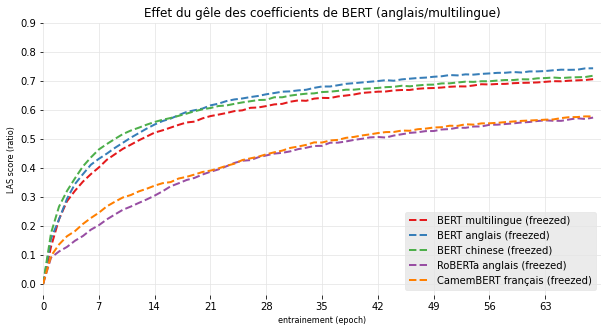

In [21]:
# put this _before_ the calls to plot and fill_between
bmap = brewer2mpl.get_map('Set1', 'qualitative', 5)
colors = bmap.mpl_colors

plt.axes(frameon=0)
plt.grid(color="0.9")

df_tableau = pd.DataFrame(columns = ['modèle' ,'LAS', 'UAS', 'Labeling score', 'POS score'])

x_max = 70
seed = 1
for i, (name, file_name) in enumerate(bert_modeles_2.items()):
    if "freeze" in file_name:
        file_name = file_name.replace("seed_1", "seed_{}".format(seed))
    path_model = os.path.join(path_folder, file_name)
    df_model = pd.read_csv(path_model, delimiter='\t')
    if "freeze" not in name:
        df_model['n_epoch'] = df_model['n_epoch'] +1
        df_model.loc[-1] = [0] * len(df_model.columns)
        df_model.index = df_model.index + 1  # shifting index
        df_model.sort_index(inplace=True) 
    
    df_tableau.loc[name] = [name] + list(df_model[['LAS_epoch', 'acc_head_epoch', 'acc_deprel_main_epoch', 'acc_pos_epoch']].iloc[df_model.idxmax()['LAS_epoch']])
    
    if "freeze" in name :
        linestyle='--'
    else:
        linestyle='-'
        

    plt.plot(df_model.iloc[:x_max]['n_epoch'], df_model.iloc[:x_max]['LAS_epoch'], linewidth=2, linestyle=linestyle,color=colors[i])

    
    
df_tableau = df_tableau.set_index("modèle")

legend = plt.legend(bert_modeles_2.keys(), loc=4);
plt.xlabel('entrainement (epoch)')
plt.ylabel('LAS score (ratio)')
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.9')
title = plt.title("Effet du gêle des coefficients de BERT (anglais/multilingue)")

x_range = int(np.ceil(x_max/10))
plt.xticks(np.arange(0, x_max, x_range))
plt.xlim([0,x_max])

plt.yticks(np.arange(0, 1, 0.1))

for ext_file in ['png', 'svg']:
    plt.savefig('3_freeze_bert_5_modeles_{}_epochs_seed_{}.'.format(x_max, seed) + ext_file, format=ext_file)